# Import Library


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column',None)

# Load Dataset


In [2]:
df = pd.read_csv("diabetes.csv")
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
143,10,108,66,0,0,32.4,0.272,42,1
70,2,100,66,20,90,32.9,0.867,28,1
516,9,145,88,34,165,30.3,0.771,53,1
220,0,177,60,29,478,34.6,1.072,21,1
479,4,132,86,31,0,28.0,0.419,63,0
215,12,151,70,40,271,41.8,0.742,38,1
258,1,193,50,16,375,25.9,0.655,24,0
2,8,183,64,0,0,23.3,0.672,32,1
531,0,107,76,0,0,45.3,0.686,24,0
589,0,73,0,0,0,21.1,0.342,25,0


# Info Data

In [3]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Describe
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


dikolom glucose,bloodpressure,skinthickness,insulin,dan BMI untuk nilai minimalnya adalah 0, ini sangat tidak masuk akal. kita akan merubah data 0 menjadi NaN.

In [5]:
# Mengganti nilai 0 dengan NaN dikolom Glucose,BloodPressure,SkinThickness,Insulin,dan BMI
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

# Preprocessing Data

## Data Cleaning

### Missing Value

In [6]:
# Cek Missing Value
df.isna().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
# Menggantikan Nilai NaN dengan median
df['Glucose'].fillna(df['Glucose'].median(),inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].median(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)


<ipython-input-7-1a074e467a63>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Glucose'].fillna(df['Glucose'].median(),inplace=True)
<ipython-input-7-1a074e467a63>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

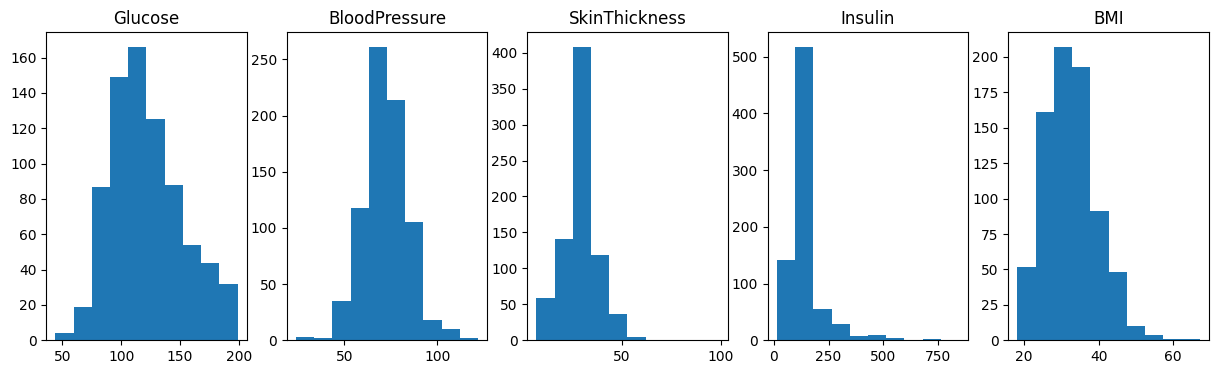

In [8]:
# Visualisasi
plt.figure(figsize=(15,4))

plt.subplot(1,5,1)
plt.hist(df['Glucose'])
plt.title('Glucose')

plt.subplot(1,5,2)
plt.hist(df['BloodPressure'])
plt.title('BloodPressure')

plt.subplot(1,5,3)
plt.hist(df['SkinThickness'])
plt.title('SkinThickness')

plt.subplot(1,5,4)
plt.hist(df['Insulin'])
plt.title('Insulin')

plt.subplot(1,5,5)
plt.hist(df['BMI'])
plt.title('BMI')

plt.show()

### Duplicate

In [9]:
# cek data duplikat
df.duplicated().sum()

np.int64(0)

### Outlier


In [10]:
import scipy.stats as stats
# Membuat fungsi untuk cek outlier menggunakan visualisasi
def chek_plot (df,kolom) :
  plt.figure(figsize=(16,4))

# Historgram
  plt.subplot(1,3,1)
  sns.histplot(df[kolom],bins=20,kde=True)
  plt.title(f'Histogram')

# QQ_plot
  plt.subplot(1,3,2)
  stats.probplot(df[kolom], dist="norm", plot=plt)
  plt.title(f'QQ Plot')

# Box_plot
  plt.subplot(1,3,3)
  sns.boxplot(df[kolom])
  plt.title(f'Boxplot')

  plt.show()

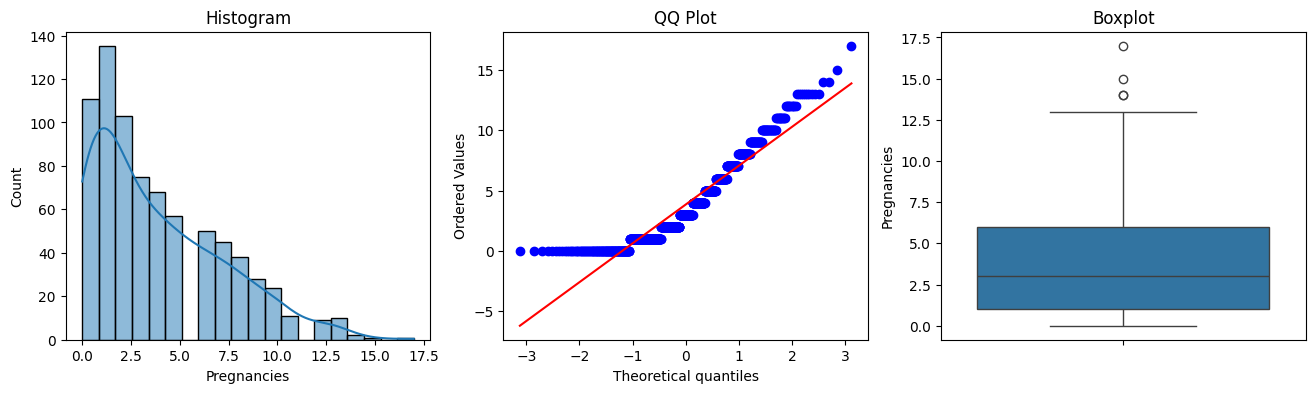

In [11]:
# cek outlier dikolom Pregnancies
chek_plot(df,'Pregnancies')

Ada outlier, namun outlier yang ada adalah nilai yang valid atau masih masuk akan, karena sesuai data dan informasi bahwa seorang wanita bisa mengalami kehamilan selama masa suburya sebanyak 15-20 kali kehamilan.

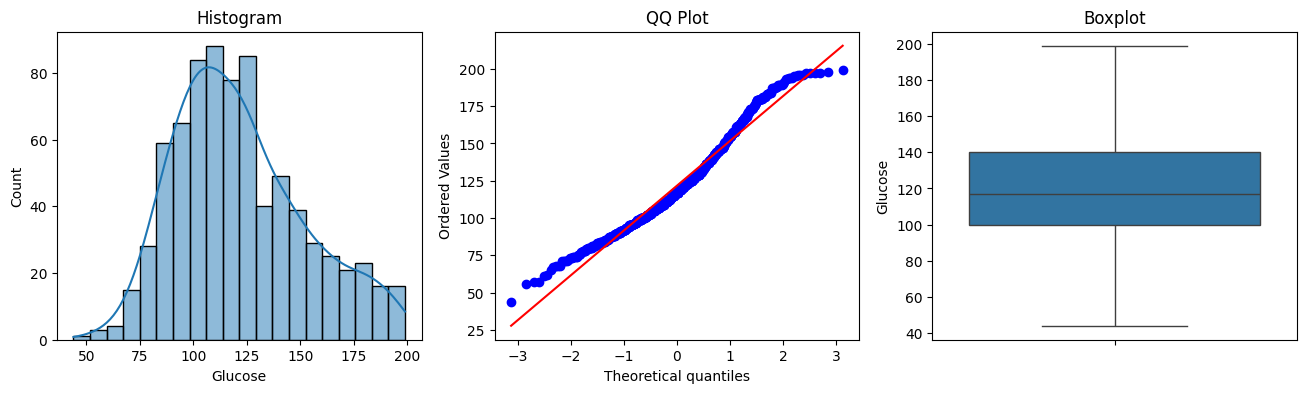

In [12]:
# Cek Outlier Dikolom Glucose
chek_plot(df,'Glucose')

Tidak ada outlier dikolom glucose

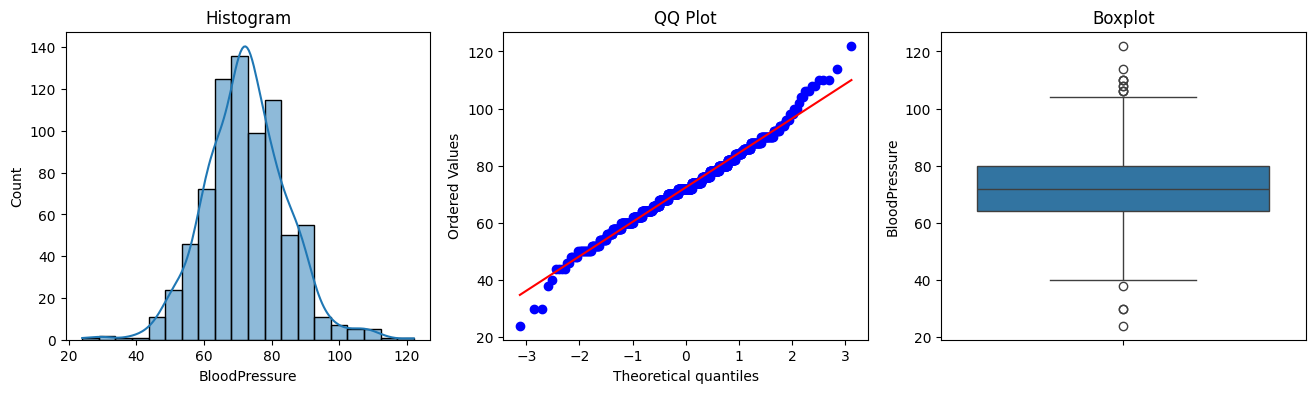

In [13]:
# Cek Outlier dikolom BloodPressure
chek_plot(df,'BloodPressure')

Ada outlier dan nilai outlier tersebut invalid. tidak wajar apa bila ada tekanan darah dibawah 40.

In [14]:
# handling outlier dikolom BloodPressure
df.loc[df['BloodPressure'] < 40, 'BloodPressure'] = np.nan
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace=True)

<ipython-input-14-17fa38863723>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace=True)


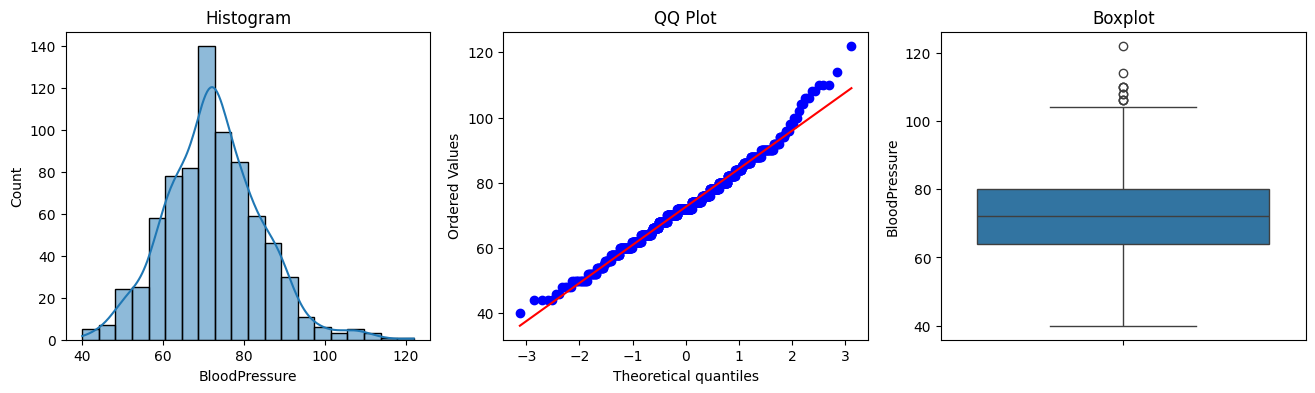

In [15]:
# Cek kembali Outlier dikolom BloodPressure
chek_plot(df,'BloodPressure')

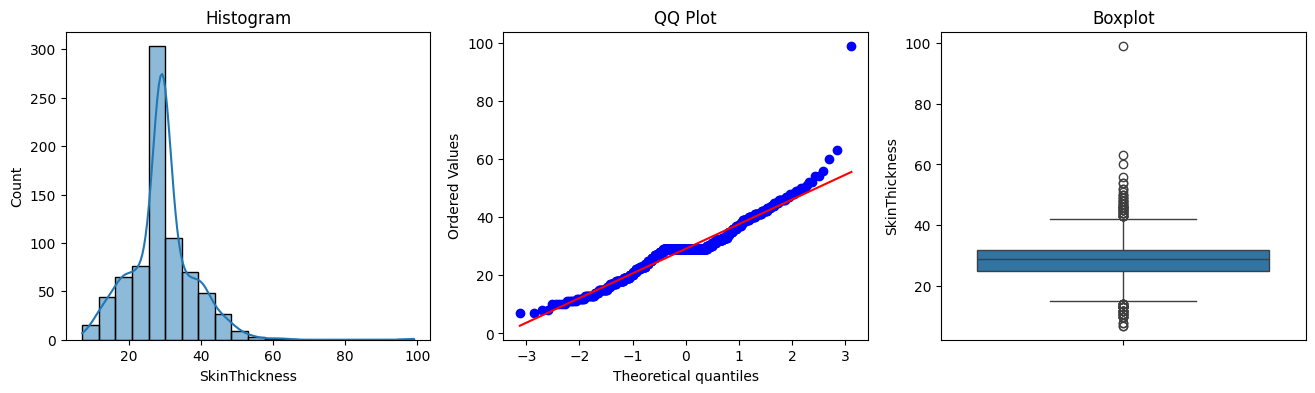

In [16]:
# Cek outlier dikolom SkinThickness
chek_plot(df,'SkinThickness')

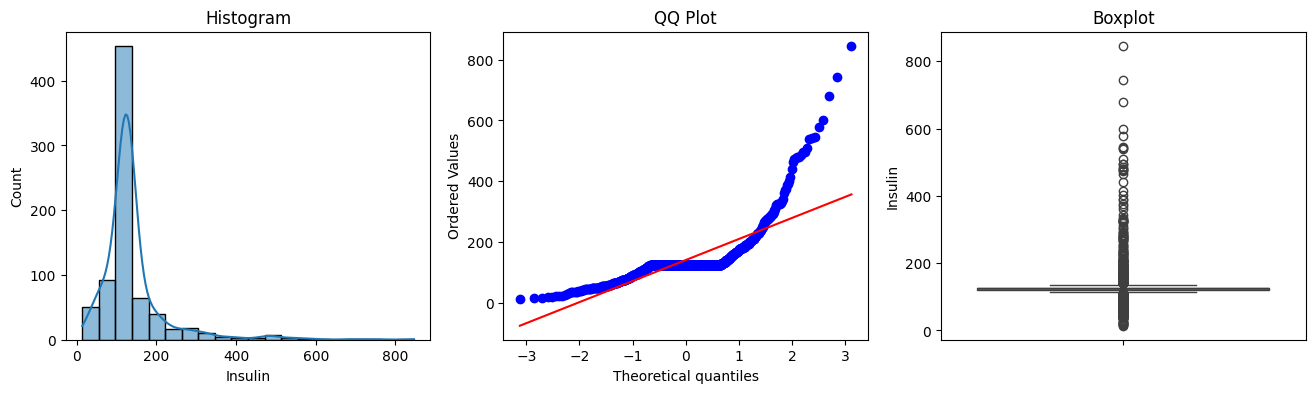

In [17]:
# cek Outlier dikolom Insulin
chek_plot(df,'Insulin')

Ada banyak outlier. Saya akan drop kolom insulin


In [18]:
# hapus kolom insulin
df.drop('Insulin',axis=1,inplace=True)


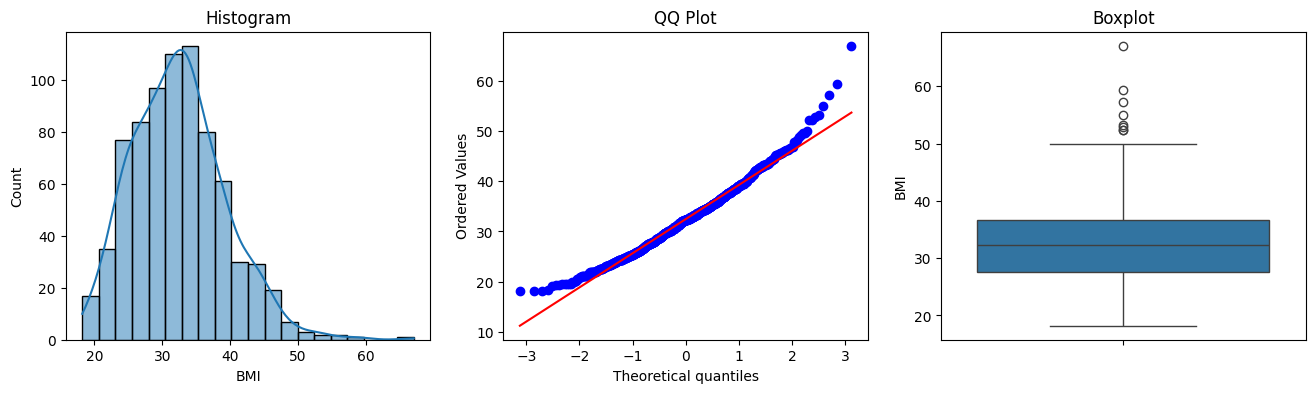

In [19]:
# Cek Outlier dikolom BMI
chek_plot(df,'BMI')

terdapat outlier namun nilai tersebut adalah valid

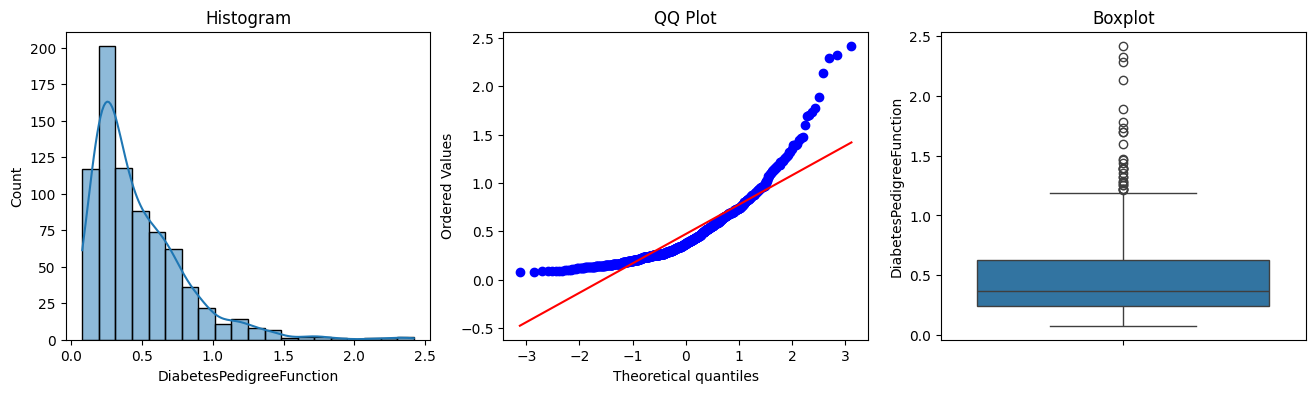

In [20]:
# Cek outlier dikolom DiabetesPedigreeFunction
chek_plot(df,'DiabetesPedigreeFunction')

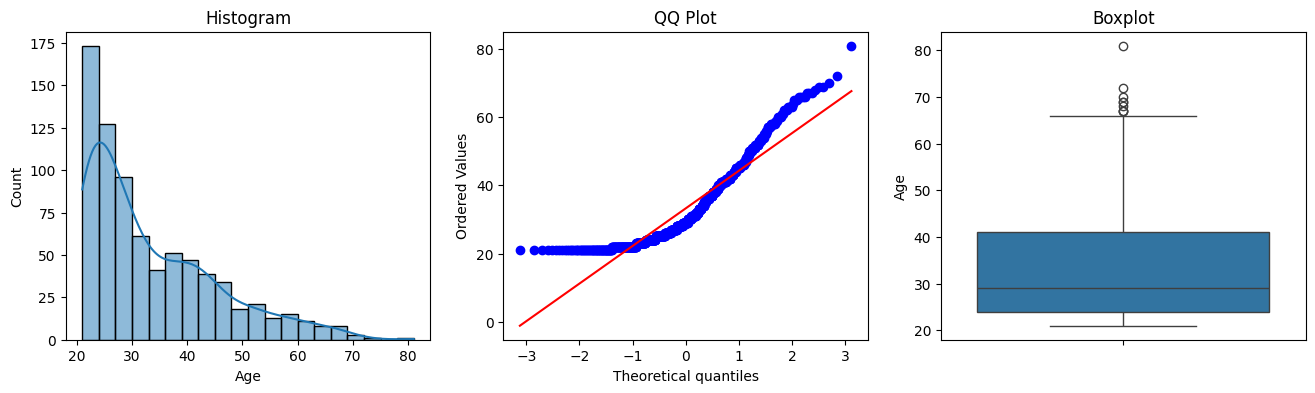

In [21]:
# Cek outlier dikolom Age
chek_plot(df,'Age')

## Exploratory Data Analysis

In [22]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
578,10,133.0,68.0,29.0,27.0,0.245,36,0
763,10,101.0,76.0,48.0,32.9,0.171,63,0
729,2,92.0,52.0,29.0,30.1,0.141,22,0
238,9,164.0,84.0,21.0,30.8,0.831,32,1
524,3,125.0,58.0,29.0,31.6,0.151,24,0


1. Diabetes berdasarkan kehamilan

Data jumlah kehamilan :
Pregnancies_Group
Pregnancies_0        67
Pregnancies_1-5      19
Pregnancies_6-10     50
Pregnancies_11-15    62
Pregnancies_16+      70
Name: count, dtype: int64


<ipython-input-95-cb9f0a82167d>:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=count_by_pregnan.index, y=count_by_pregnan.values, palette='viridis', ci=None)
<ipython-input-95-cb9f0a82167d>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=count_by_pregnan.index, y=count_by_pregnan.values, palette='viridis', ci=None)


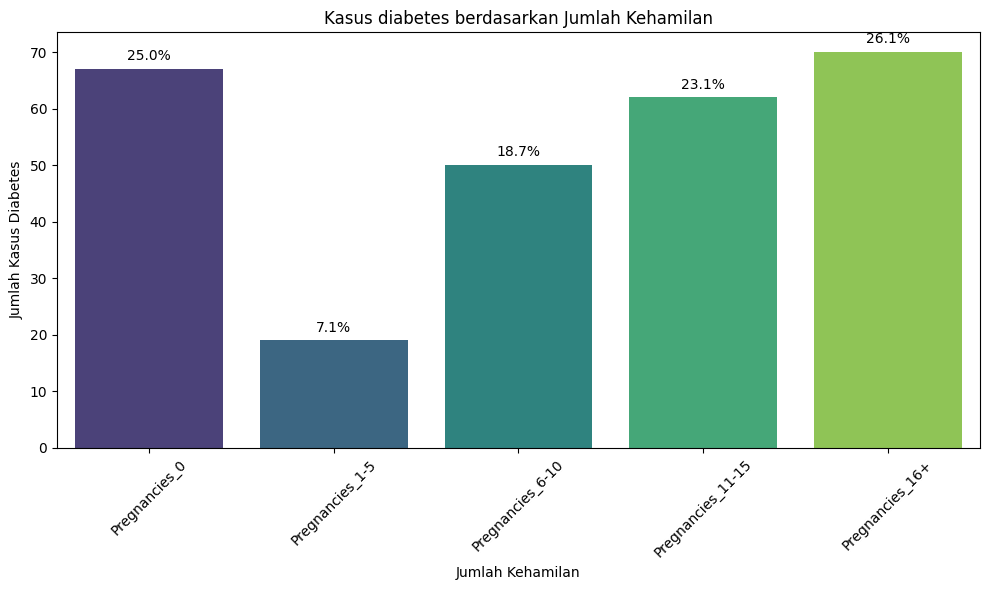

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# mengambil outcome = 1
group_pregnan = df[df['Outcome'] == 1].copy()

# Group Pregnancies menggunakan quantile
group_pregnan['Pregnancies_Group'] = pd.qcut(
    df['Pregnancies'], q=5,
    labels=[
        'Pregnancies_0',
        'Pregnancies_1-5',
        'Pregnancies_6-10',
        'Pregnancies_11-15',
        'Pregnancies_16+']
)

# Hitung jumlah kasus per kelompok jumlah kehamilan
count_by_pregnan = group_pregnan['Pregnancies_Group'].value_counts().sort_index()
total = count_by_pregnan.sum()
percentages = (count_by_pregnan / total) * 100

print(f"Data jumlah kehamilan :\n{count_by_pregnan}")

# Plot distribusi dengan persentase di atas batang
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=count_by_pregnan.index, y=count_by_pregnan.values, palette='viridis', ci=None)

# Tambahkan label persentase
for i, (value, percent) in enumerate(zip(count_by_pregnan.values, percentages)):
    ax.text(i, value + 1, f'{percent:.1f}%', ha='center', va='bottom', fontsize=10)

plt.title('Kasus diabetes berdasarkan Jumlah Kehamilan')
plt.xlabel('Jumlah Kehamilan')
plt.ylabel('Jumlah Kasus Diabetes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




- Pada pregnancies_0 ada banyak kasus diabetes yang terjadi. didataset ini tidak ada informasi mengenai jenis kelamin, bisa saja yang menyebabkan pregnancies_0 juga tinggi untuk kasus diabetesnya dikarenakan adalah gabungan pria dan wanita yang belum pernah melahirkan.
- Ada peningkatan diabetes dari jumlah kehamilan 1-5,6-10,11-15 dan 16+ menandakan bahwa jumlah kehamilan berpengaruh terhadap resiko diabetes. tentunya jumlah kehamilan hanya salah satu penyebab resiko diabetes.

2. Seberapa besar pengaruh dari glucose terhadap diabetes

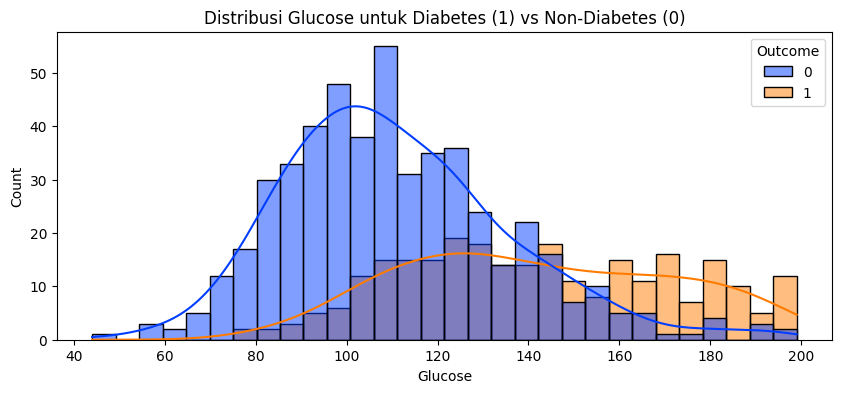

In [24]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='Glucose', hue='Outcome', kde=True, bins=30,palette='bright')
plt.title('Distribusi Glucose untuk Diabetes (1) vs Non-Diabetes (0)')
plt.show()

- Dari visualisasi ini menunjukan bahwa tigkat glucose diatas 140 sudah mengalami atau beresiko terkena diabetes.
- semakin tinggi glocose akan semakin tinggi juga resiko terkena diabetes

3. BMI vs Diabetes

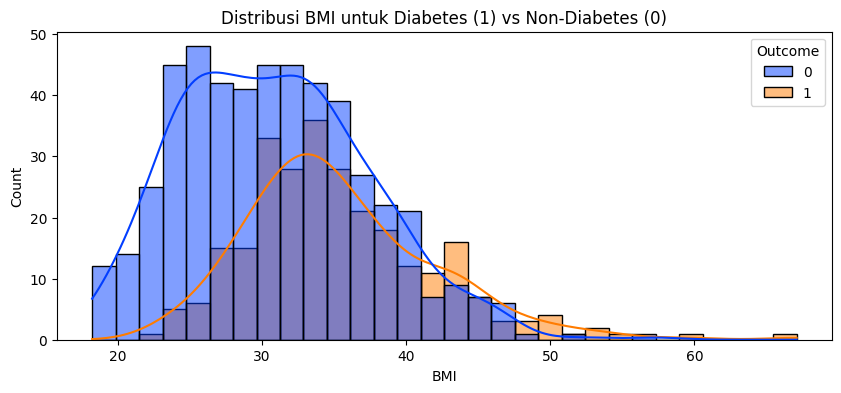

In [25]:
# BMI vs Diabetes
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='BMI', hue='Outcome', kde=True, bins=30,palette='bright')
plt.title('Distribusi BMI untuk Diabetes (1) vs Non-Diabetes (0)')
plt.show()

- kasus diabetes terjadi pada BMI diatas 40 (obesitas)
- tidak ada terjadi kasus diabetes dibawah 30 (normal)

4. Glucose dan BMI terhadap Diabetes

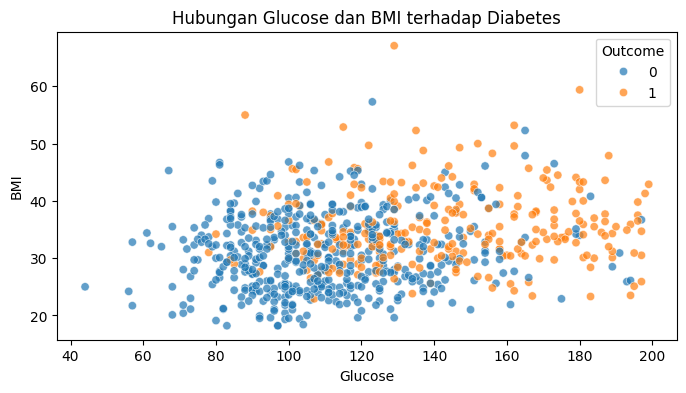

In [26]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome',data=df, alpha=0.7)
plt.title('Hubungan Glucose dan BMI terhadap Diabetes')
plt.show()


- Gula darah adalah faktor utama meningkatnya resiko diabetes
- ada kasus diabetes direntang glucose 80-100. ini kemungkinan adalah faktor genetik
- gula darah diatas 140 memiliki resiko daibetes yang lebih tinggi.
- BMI diatas 30 (Obesitas) sudah ada kasus diabetes walaupun Glucose normal. Obesitas juga berpengaruh terhadap resiko  diabetes.

5. Apakah seiring bertambahnya usia akan meningkatkan resiko diabetes ?

<ipython-input-27-c41fe1e2d728>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_by_age.index, y=count_by_age.values,palette='viridis')


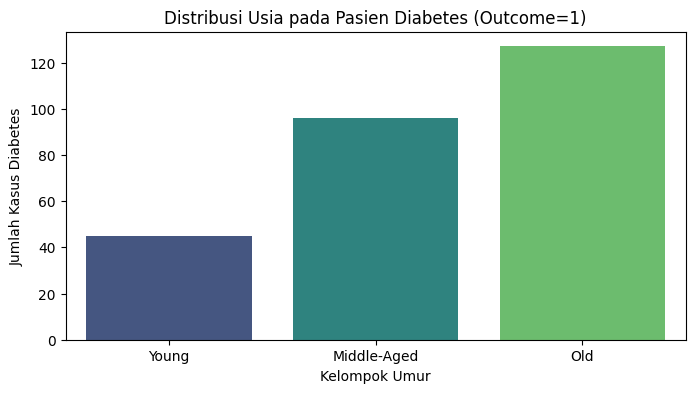

In [27]:
# mengambil outcome 1
diabetes_cases = df[df['Outcome'] == 1].copy()  # Hanya data diabetes

# buat kelompok umur menggunakan quantile
diabetes_cases['Age_Group'] = pd.qcut(df['Age'], q=3, labels=['Young', 'Middle-Aged', 'Old'])

# Hitung jumlah kasus per kelompok umur
count_by_age = diabetes_cases['Age_Group'].value_counts().sort_index()

# Plot distribusi
plt.figure(figsize=(8, 4))
sns.barplot(x=count_by_age.index, y=count_by_age.values,palette='viridis')
plt.title('Distribusi Usia pada Pasien Diabetes (Outcome=1)')
plt.xlabel('Kelompok Umur')
plt.ylabel('Jumlah Kasus Diabetes')
plt.show()

- Dari visualisasi diatas terlihat bahwa ada peningkatan yang signifikan dari kategori usai muda sampai yang tua.
- ini membuktikan bahwa seiringnya bertambah usia, akan semakin beresiko diabetes. sesuai dengan data bahwa usia diatas 35 tahun, tubuh manusia akan mengalami penurunan produksi insulin.

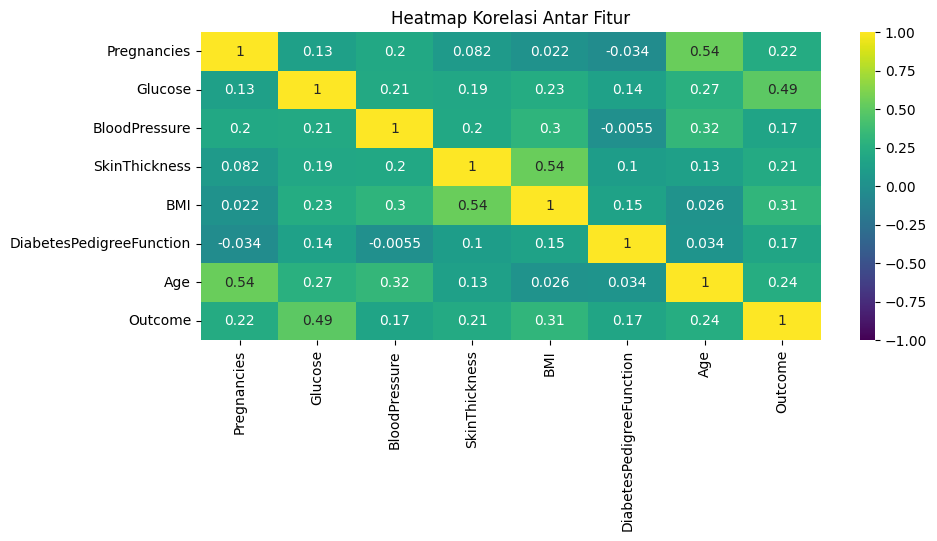

In [28]:
# koralasi
plt.figure(figsize=(10, 4))
sns.heatmap(df.corr(), annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

- korelasi tertinggi dengan outcome(diabetes) adalah Glucose (0.49). ini menunjukan bahwa Glucose sangat berpengaruh terhadap resiko terkena diabetes
- yang memmiliki korelasi tertinggi kedua adalah BMI(0.31), orang dengan berat badan yang berelibahan juga sangat mungkin terkena diabetes.
- kemudian age(0.24),Pregnancies(0.22),skinthickness(0.21),dan insulin(0.2), juga berpengaruh terhadap resiko terkena diabetes.

## Spliting Data

In [29]:
# split data
from sklearn.model_selection import train_test_split
x = df.drop('Outcome', axis=1)
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#Modeling

### Decision tree

In [30]:
# import modul Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, f1_score,roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [31]:
# Membuat model dicision tree
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

#### Hyperparameter Tuning

In [32]:
# tuning parameter

# parameter
param_grid = {
    'max_depth': [3,5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [5,6,7,8,9,10],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [{0:1,1:1.5}]
}

# Cross validation
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='recall')
grid_search_dt.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'class_weight': [{0: 1, 1: 1.5}],
                         'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall')

In [33]:
# the results
cv_result = pd.DataFrame(grid_search_dt.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
3,"{'class_weight': {0: 1, 1: 1.5}, 'criterion': ...",0.759801,1
6,"{'class_weight': {0: 1, 1: 1.5}, 'criterion': ...",0.759801,1
5,"{'class_weight': {0: 1, 1: 1.5}, 'criterion': ...",0.759801,1
4,"{'class_weight': {0: 1, 1: 1.5}, 'criterion': ...",0.759801,1
7,"{'class_weight': {0: 1, 1: 1.5}, 'criterion': ...",0.759801,1
...,...,...,...
56,"{'class_weight': {0: 1, 1: 1.5}, 'criterion': ...",0.690698,133
48,"{'class_weight': {0: 1, 1: 1.5}, 'criterion': ...",0.690698,133
54,"{'class_weight': {0: 1, 1: 1.5}, 'criterion': ...",0.690698,133
49,"{'class_weight': {0: 1, 1: 1.5}, 'criterion': ...",0.690698,133


In [34]:
# Clasifiaction report data train
y_pred_train = grid_search_dt.best_estimator_.predict(x_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       401
           1       0.59      0.77      0.67       213

    accuracy                           0.74       614
   macro avg       0.72      0.74      0.73       614
weighted avg       0.76      0.74      0.74       614



#### Evaluation

In [35]:
# Clasifiaction report data test
y_pred_test = grid_search_dt.best_estimator_.predict(x_test) # default threshold (0.5)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.61      0.69        99
           1       0.51      0.75      0.61        55

    accuracy                           0.66       154
   macro avg       0.66      0.68      0.65       154
weighted avg       0.70      0.66      0.66       154



In [36]:
# Roc_auc

# Prediksi probabilitas
y_pred_prob = grid_search_dt.best_estimator_.predict_proba(x_test)[:, 1]  # ambil probabilitas kelas 1 (sakit)

# Hitung AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc:.2f}")

AUC Score: 0.71


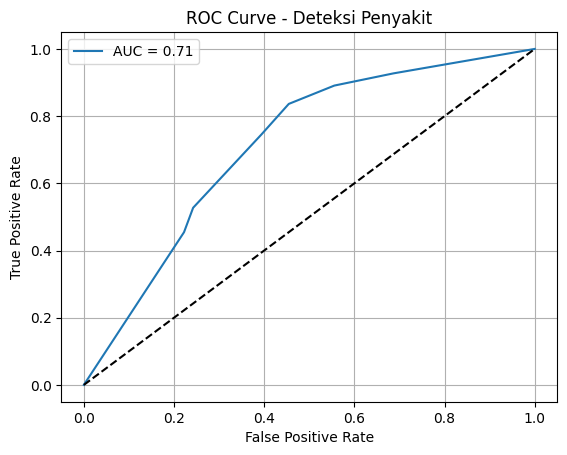

In [37]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Deteksi Penyakit")
plt.legend()
plt.grid()
plt.show()

Hasil reccal dan precision sebelum tuning threshold :

- Train : recall --> 0.77, precision --> 0.59
- Test : recall --> 0.75, precision :0.51

- ROC-AUC = 71%

Dari hasil recall didata train adalah 77%, recall data test 75%, artinya model kita memiliki stabilitas dan konsistensi performa pada data yang belum pernah dilihat(test) hampir setara dengan data train.

Hasil dari matrix AUC --> 71%, Artinya model kita mampu membedakan atau mampu mengklasifikasikan positif dan negatif. 71% kemungkinan bahwa model akan memberikan skor prediksi lebih tinggi untuk sampel positif daripada sampel negatif secara acak.

Dengan hasil ini, model kita sudah cukup baik untuk melakukan prediksi sesuai dengan tujuan kita yaitu skrining awal untuk deteksi penyakit diabetes. Namun nilai recall bisa ditingkatkan dengan tuning threshold.

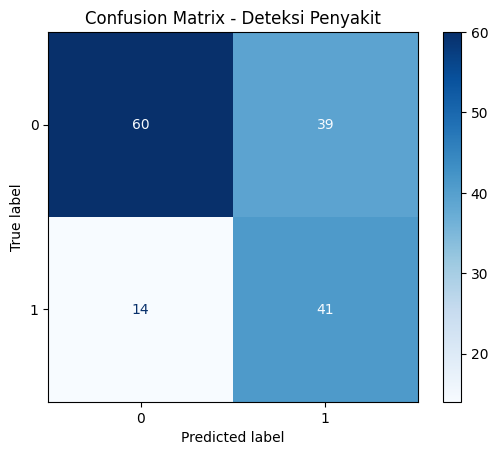

In [38]:
# Confusion marix
cm_dt = confusion_matrix(y_test, y_pred_test)

# Visualisasi
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=grid_search_dt.best_estimator_.classes_)
disp_dt.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Deteksi Penyakit")
plt.show()

Hasil confusion matrix Decision Tree :

- TN (True-Negatif) = 60
- FP (False-Positif) = 39
- TP (True-Positif) = 41
- FN (False-Negatif) = 14



1.   Model Mampu mendeteksi TP(True-Positif) sebanyak 41 kasus.
2.   Model salah memprediksi sakit tetapi sebenarnya sehat(FP = 39 kasus)
3. Model mampu memprediksi TN(True-Negatif) sebanyak 60 kasus.
4. Model gagal mendeteksi 14 kasus yang sebenarnya sakit, yang berpotensi berbahaya karena keterlambatan perawatan.

dari semua hasil model yang ada, yang paling berbahaya adalah FN(False-Negatif), dan dari model ini kasus FN cuma 14 kasus dan yang terkecil dari semua hasil prediksi. Model kita sudah cukup baik meskipun masih ada 14 kasus positif sakit.




#### Tuning Threshold

In [39]:
thresholds = np.arange(0.1, 0.9, 0.05)
for t in thresholds:
    y_tuning = (y_pred_prob >= t).astype(int)
    prec = precision_score(y_test, y_tuning)
    rec = recall_score(y_test, y_tuning)
    f1 = f1_score(y_test, y_tuning)
    print(f"Threshold: {t:.2f} | Precision: {prec:.2f} | Recall: {rec:.2f} | F1: {f1:.2f}")

Threshold: 0.10 | Precision: 0.43 | Recall: 0.93 | F1: 0.59
Threshold: 0.15 | Precision: 0.43 | Recall: 0.93 | F1: 0.59
Threshold: 0.20 | Precision: 0.47 | Recall: 0.89 | F1: 0.62
Threshold: 0.25 | Precision: 0.47 | Recall: 0.89 | F1: 0.62
Threshold: 0.30 | Precision: 0.47 | Recall: 0.89 | F1: 0.62
Threshold: 0.35 | Precision: 0.51 | Recall: 0.84 | F1: 0.63
Threshold: 0.40 | Precision: 0.51 | Recall: 0.84 | F1: 0.63
Threshold: 0.45 | Precision: 0.51 | Recall: 0.84 | F1: 0.63
Threshold: 0.50 | Precision: 0.51 | Recall: 0.75 | F1: 0.61
Threshold: 0.55 | Precision: 0.51 | Recall: 0.75 | F1: 0.61
Threshold: 0.60 | Precision: 0.55 | Recall: 0.53 | F1: 0.54
Threshold: 0.65 | Precision: 0.55 | Recall: 0.53 | F1: 0.54
Threshold: 0.70 | Precision: 0.55 | Recall: 0.53 | F1: 0.54
Threshold: 0.75 | Precision: 0.53 | Recall: 0.45 | F1: 0.49
Threshold: 0.80 | Precision: 0.00 | Recall: 0.00 | F1: 0.00
Threshold: 0.85 | Precision: 0.00 | Recall: 0.00 | F1: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Dari hasil tuning threshold, threshold yang optimal untuk meningkatkan recall tanpa harus banyak mengorbankan prrecision adalah threshold 0.40

In [40]:
# Threshold optimal
optimal_threshold = 0.4
y_pred_optimal = (y_pred_prob >= optimal_threshold).astype(int)

#### Final Evaluation

In [86]:
# Evaluasi dengan threshold optimal pada data train
print("\nEvaluation with optimal threshold pada data Train:")

# Hitung Probabilitas didata train
y_pred_prob_train = grid_search_dt.best_estimator_.predict_proba(x_train)[:, 1]

y_pred_optimal_train = (y_pred_prob_train >= optimal_threshold).astype(int)

print(classification_report(y_train, y_pred_optimal_train)) # threshold 0.35


Evaluation with optimal threshold pada data Train:
              precision    recall  f1-score   support

           0       0.89      0.65      0.75       401
           1       0.56      0.84      0.67       213

    accuracy                           0.72       614
   macro avg       0.72      0.75      0.71       614
weighted avg       0.77      0.72      0.72       614



In [88]:
# Evaluasi dengan threshold optimal pada data test
print("\nEvaluation with optimal threshold pada data test:")
print(classification_report(y_test, y_pred_optimal)) # threshold 0.4



Evaluation with optimal threshold pada data test:
              precision    recall  f1-score   support

           0       0.89      0.59      0.71        99
           1       0.54      0.87      0.67        55

    accuracy                           0.69       154
   macro avg       0.72      0.73      0.69       154
weighted avg       0.77      0.69      0.69       154



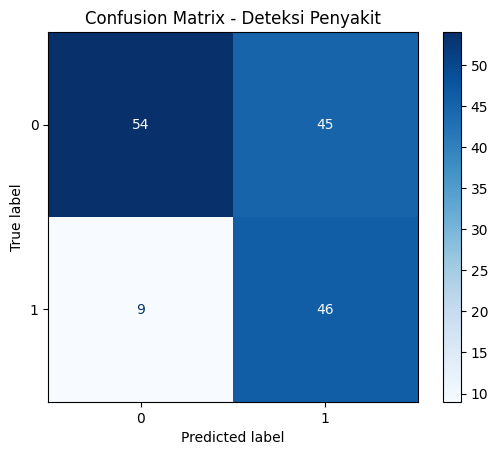

In [42]:
# Confusion marix threshold optimal
cm_dt_optimal = confusion_matrix(y_test, y_pred_optimal)

# Visualisasi
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt_optimal, display_labels=grid_search_dt.best_estimator_.classes_)
disp_dt.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Deteksi Penyakit")
plt.show()

Hasil confusion matrix setelah tuning threshold :

- TN (True-Negatif) = 54
- FP (False-Positif) = 45
- TP (True-Positif) = 46
- FN (False-Negatif) = 9



1.   Model Mampu mendeteksi TP(True-Positif) sebanyak 46 kasus.
2.   Model salah memprediksi sakit tetapi sebenarnya sehat(FP = 45 kasus)
3. Model mampu memprediksi TN(True-Negatif) sebanyak 54 kasus.
4. Model gagal mendeteksi 9 kasus yang sebenarnya sakit, yang berpotensi berbahaya karena keterlambatan perawatan.

dari hasil tuning threshold nilai recall meningkat dari 0.75 --> 0.84 dengan nilai precision 0.51. model sekarang sudah lebih sensitif ( deteksi lebih banyak kasus )

In [43]:
# Hitung AUC
auc = roc_auc_score(y_test, y_pred_optimal)
print(f"AUC Score: {auc:.2f}")

AUC Score: 0.69


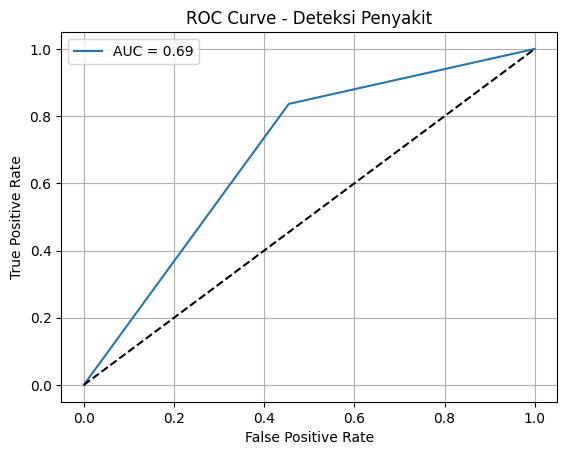

In [44]:
# Plot ROC Curve - Threshold optimal
fpr, tpr, thresholds = roc_curve(y_test, y_pred_optimal)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Deteksi Penyakit")
plt.legend()
plt.grid()
plt.show()

### Random Forest

In [45]:
# Import modul random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, f1_score,roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [46]:
# Model random forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

#### Hyperparamete Tuning

In [47]:
# Tuning parameter

# Parameter
param_grid = {
    'n_estimators': [50,100,120],
    'max_depth': [3,4,5],
    'min_samples_split': [2, 5, 10,12,14,15],
    'min_samples_leaf': [5,10,12,15],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [{0:1,1:1.5}]
}

# Cross validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='recall')
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'class_weight': [{0: 1, 1: 1.5}],
                         'max_depth': [3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 12, 15],
                         'min_samples_split': [2, 5, 10, 12, 14, 15],
                         'n_estimators': [50, 100, 120]},
             scoring='recall')

In [48]:
# the results
cv_result = pd.DataFrame(grid_search_rf.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
282,"{'class_weight': {0: 1, 1: 1.5}, 'max_depth': ...",0.732558,1
285,"{'class_weight': {0: 1, 1: 1.5}, 'max_depth': ...",0.732558,1
279,"{'class_weight': {0: 1, 1: 1.5}, 'max_depth': ...",0.732558,1
273,"{'class_weight': {0: 1, 1: 1.5}, 'max_depth': ...",0.732558,1
276,"{'class_weight': {0: 1, 1: 1.5}, 'max_depth': ...",0.732558,1
...,...,...,...
294,"{'class_weight': {0: 1, 1: 1.5}, 'max_depth': ...",0.676412,425
360,"{'class_weight': {0: 1, 1: 1.5}, 'max_depth': ...",0.676412,425
366,"{'class_weight': {0: 1, 1: 1.5}, 'max_depth': ...",0.676412,425
297,"{'class_weight': {0: 1, 1: 1.5}, 'max_depth': ...",0.671872,431


In [49]:
# Clasifiaction report data train
y_pred_train_rf = grid_search_rf.best_estimator_.predict(x_train)
print(classification_report(y_train, y_pred_train_rf))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       401
           1       0.70      0.80      0.75       213

    accuracy                           0.81       614
   macro avg       0.80      0.81      0.80       614
weighted avg       0.82      0.81      0.82       614



#### Evaluation

In [50]:
# Clasifiaction report data test
y_pred_test_rf = grid_search_rf.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        99
           1       0.66      0.75      0.70        55

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.78      0.77      0.78       154



In [78]:
# Roc_auc

# Prediksi probabilitas
y_pred_prob = grid_search_rf.best_estimator_.predict_proba(x_test)[:, 1]  # ambil probabilitas kelas 1 (sakit)

# Hitung AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc:.2f}")

AUC Score: 0.83


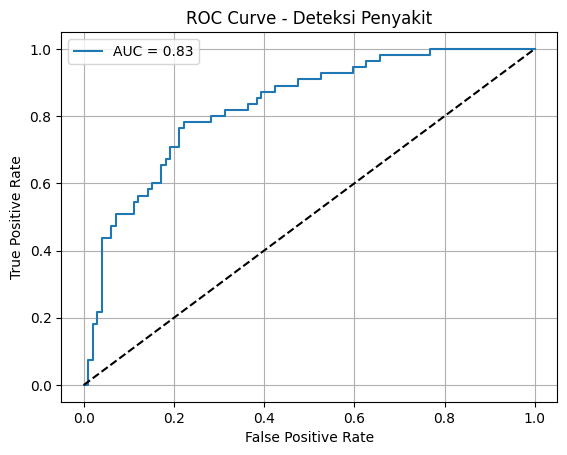

In [90]:
# 7. Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Deteksi Penyakit")
plt.legend()
plt.grid()
plt.show()

Hasil reccal dan precision sebelum tuning threshold :

- Train : recall --> 0.80, precision --> 0.70
- Test : recall --> 0.75, precision :0.66

- ROC-AUC = 83%

Dari hasil recall didata train adalah 80%, recall data test 75%, artinya model kita memiliki stabilitas dan konsistensi performa pada data yang belum pernah dilihat(test) hampir setara dengan data train.

Hasil dari matrix AUC --> 83%, Artinya model kita mampu membedakan atau mampu mengklasifikasikan positif dan negatif. 83% kemungkinan bahwa model akan memberikan skor prediksi lebih tinggi untuk sampel positif daripada sampel negatif secara acak.

Dengan hasil ini, model kita sudah cukup baik untuk melakukan prediksi sesuai dengan tujuan kita yaitu skrining awal untuk deteksi penyakit diabetes. Namun nilai recall bisa ditingkatkan dengan tuning threshold.

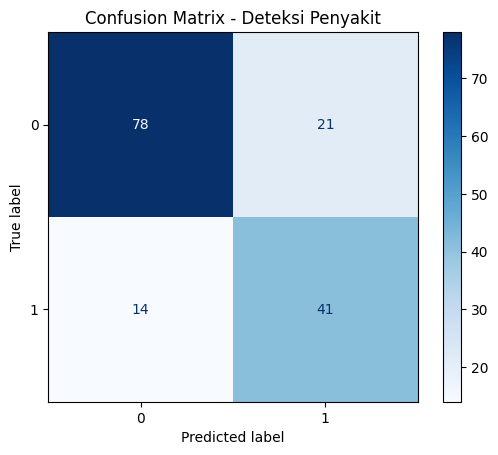

In [80]:
# Confusion marix
# Use the predictions on the test set (y_pred_test_rf)
cm_rf = confusion_matrix(y_test, y_pred_test_rf)

# Visualisasi
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=grid_search_rf.best_estimator_.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Deteksi Penyakit")
plt.show()

Hasil confusion matrix sebelum tuning threshold :

- TN (True-Negatif) = 78
- FP (False-Positif) = 21
- TP (True-Positif) = 41
- FN (False-Negatif) = 14



1.   Model Mampu mendeteksi TP(True-Positif) sebanyak 41 kasus.
2.   Model salah memprediksi sakit tetapi sebenarnya sehat(FP = 21 kasus)
3. Model mampu memprediksi TN(True-Negatif) sebanyak 78 kasus.
4. Model gagal mendeteksi 14 kasus yang sebenarnya sakit, yang berpotensi berbahaya karena keterlambatan perawatan.

dari semua hasil model yang ada, yang paling berbahaya adalah FN(False-Negatif), dan dari model ini kasus FN cuma 14 kasus dan yang terkecil dari semua hasil prediksi. Model kita sudah cukup baik meskipun masih ada 14 kasus positif sakit.


#### Tuning Threshold

In [81]:
thresholds = np.arange(0.1, 0.9, 0.05)
for t in thresholds:
    y_tuning = (y_pred_prob >= t).astype(int)
    prec = precision_score(y_test, y_tuning)
    rec = recall_score(y_test, y_tuning)
    f1 = f1_score(y_test, y_tuning)
    print(f"Threshold: {t:.2f} | Precision: {prec:.2f} | Recall: {rec:.2f} | F1: {f1:.2f}")

Threshold: 0.10 | Precision: 0.38 | Recall: 1.00 | F1: 0.55
Threshold: 0.15 | Precision: 0.42 | Recall: 1.00 | F1: 0.59
Threshold: 0.20 | Precision: 0.44 | Recall: 0.98 | F1: 0.60
Threshold: 0.25 | Precision: 0.45 | Recall: 0.98 | F1: 0.62
Threshold: 0.30 | Precision: 0.47 | Recall: 0.93 | F1: 0.63
Threshold: 0.35 | Precision: 0.54 | Recall: 0.87 | F1: 0.67
Threshold: 0.40 | Precision: 0.56 | Recall: 0.82 | F1: 0.66
Threshold: 0.45 | Precision: 0.61 | Recall: 0.80 | F1: 0.69
Threshold: 0.50 | Precision: 0.66 | Recall: 0.75 | F1: 0.70
Threshold: 0.55 | Precision: 0.68 | Recall: 0.65 | F1: 0.67
Threshold: 0.60 | Precision: 0.69 | Recall: 0.56 | F1: 0.62
Threshold: 0.65 | Precision: 0.76 | Recall: 0.51 | F1: 0.61
Threshold: 0.70 | Precision: 0.83 | Recall: 0.44 | F1: 0.57
Threshold: 0.75 | Precision: 0.77 | Recall: 0.18 | F1: 0.29
Threshold: 0.80 | Precision: 0.67 | Recall: 0.04 | F1: 0.07
Threshold: 0.85 | Precision: 0.00 | Recall: 0.00 | F1: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [75]:
# Threshold optimal
optimal_threshold = 0.35
y_pred_optimal = (y_pred_prob >= optimal_threshold).astype(int)

#### Final Evaluation

In [84]:
# Evaluasi dengan threshold optimal pada data train
print("\nEvaluation with optimal threshold pada data Train:")

# Hitung Probabilitas didata train
y_pred_prob_train = grid_search_rf.best_estimator_.predict_proba(x_train)[:, 1]

y_pred_optimal_train = (y_pred_prob_train >= optimal_threshold).astype(int)

print(classification_report(y_train, y_pred_optimal_train)) # threshold 0.35


Evaluation with optimal threshold pada data Train:
              precision    recall  f1-score   support

           0       0.93      0.62      0.74       401
           1       0.56      0.92      0.69       213

    accuracy                           0.72       614
   macro avg       0.75      0.77      0.72       614
weighted avg       0.80      0.72      0.73       614



In [83]:
# Evaluasi dengan threshold optimal pada data test
print("\nEvaluation with optimal threshold pada data test:")
print(classification_report(y_test, y_pred_optimal)) # threshold 0.35


Evaluation with optimal threshold pada data test:
              precision    recall  f1-score   support

           0       0.89      0.59      0.71        99
           1       0.54      0.87      0.67        55

    accuracy                           0.69       154
   macro avg       0.72      0.73      0.69       154
weighted avg       0.77      0.69      0.69       154



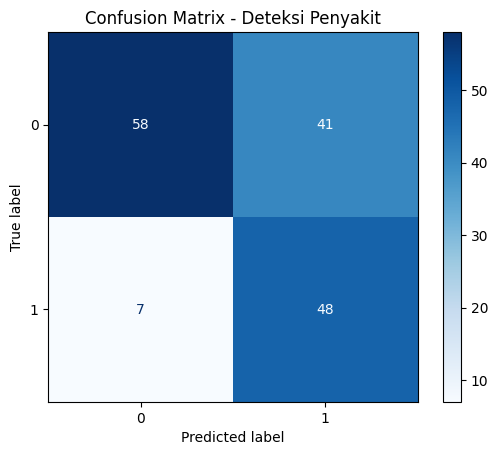

In [57]:
# Confusion marix threshold optimal
cm_rf_optimal = confusion_matrix(y_test, y_pred_optimal)

# Visualisasi
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_rf_optimal, display_labels=grid_search_dt.best_estimator_.classes_)
disp_dt.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Deteksi Penyakit")
plt.show()

Hasil confusion matrix setelah tuning threshold :

- TN (True-Negatif) = 58
- FP (False-Positif) = 41
- TP (True-Positif) = 48
- FN (False-Negatif) = 7



1.   Model Mampu mendeteksi TP(True-Positif) sebanyak 48 kasus.
2.   Model salah memprediksi sakit tetapi sebenarnya sehat(FP = 41 kasus)
3. Model mampu memprediksi TN(True-Negatif) sebanyak 58 kasus.
4. Model gagal mendeteksi 7 kasus yang sebenarnya sakit, yang berpotensi berbahaya karena keterlambatan perawatan.

dari hasil tuning threshold nilai recall meningkat dari 0.75 --> 0.87 dengan nilai precision 0.54. model sekarang sudah lebih sensitif ( deteksi lebih banyak kasus )

In [58]:
# Hitung AUC
auc = roc_auc_score(y_test, y_pred_optimal)
print(f"AUC Score: {auc:.2f}")

AUC Score: 0.73


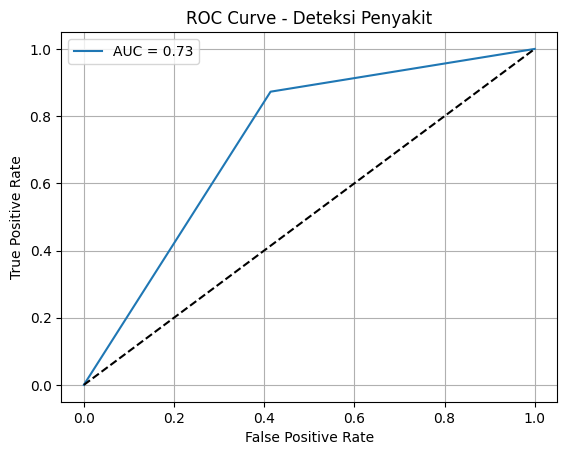

In [59]:
# Plot ROC Curve - Threshold optimal
fpr, tpr, thresholds = roc_curve(y_test, y_pred_optimal)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Deteksi Penyakit")
plt.legend()
plt.grid()
plt.show()

# Pilih Model

**Decision Tress :**

- Recall --> 0.84 (84%)
- precision --> 0.51 (51%)
- ROC-AUC --> 0.69 (69%)


**Random Forest :**

- Recall --> 0.87 (87%)
- precision --> 0.54 (54%)
- ROC-AUC --> 0.74 (74%)



**Model yang digunakan adalah Random Forest. Lebih unggul disemua metrik evaluasi.**

# Feature Importance

In [60]:
# Ambil feature importance
importance = grid_search_rf.best_estimator_.feature_importances_

In [61]:
# Buat DataFrame untuk importance
feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importance
}).sort_values('Importance', ascending=False)

<ipython-input-62-6face0db89e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


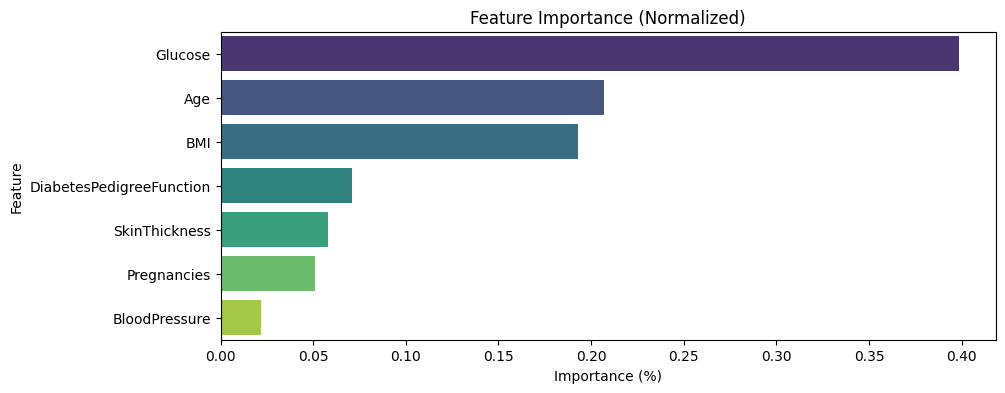

In [62]:
# Visualisasi feature importance
plt.figure(figsize=(10, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance (Normalized)')
plt.xlabel('Importance (%)')
plt.show()

- Nilai importance Glucose sangat tinggi, ini menegaskan bahwa Glucose tinggi adalah indikator utama Diabetes
- Age --> umur yang semakin tua meningkatkan resiko diabetes, karna semakin tua seseorang, produksi insulin semakin rendah.
- Nilai importance BMI tinggi, ini juga meningkatkan kemungkinan prediksi diabetes. obesitas juga merupakan faktor utama resiko diabetes.
- genetik(diabetespedigreefunction) adalah riwayat diabetes dalam keluarga. Faktor genetik memang berperan, tetapi tidak sebesar faktor langsung seperti glukosa atau BMI.
- Pregnancies (Kehamilan) juga berpengaruh terhadap resiko diabetes, namun nilai importancenya kecil.
- SkinThickness. Ketebalan lipatan kulit sering terkait dengan lemak tubuh, tetapi pengaruhnya lebih kecil dibanding BMI.
- BloodPressure. Tekanan darah mungkin kurang relevan dalam model ini, atau efeknya sudah tercakup oleh fitur lain seperti BMI/glukosa.

# Recommendation

- Rajin kontrol gula darah sejak dini untuk mencegah diabetes tipe 1. diabetes tipe 1 adalah kondisi gula darah tinggi akibat tubuh tidak cukup menghasilkan insulin. belum diketahui penyebab diabetes tipe 1, namun kondisi ini diduga dipicu oleh genetik.
- sering kontrol gula darah terutama pada saat umur diatas 35 tahun. pada saat umur diatas 35 tahun tubuh akan kehilangan kemampuan untuk memproduksi insulin dengan jumlah yang sama seperti saat masih muda.
- Menerapkan pola hidup sehat (olahraga, diet) untuk menjaga berat badan ideal.
- konsultasi dengan dokter jika memiliki riwayat keluarga diabetes.